In [1]:
import pandas as pd
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib Inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-notebook')

import matplotlib as mpl
from IPython.display import set_matplotlib_formats

#upload image
from IPython.display import Image

In [2]:
#ignore warnings
import warnings

## 1.set option

In [3]:
#dataframe max row, column 500

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## 2.dataset 확인

- zigzag_DB.db에 연결한 뒤 DB schema를 출력한 후 order 테이블을 불러오겠습니다.

In [4]:
#connect

conn = sqlite3.connect('d:/data/zigzag_DB.db')
conn

In [5]:
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, conn)

for i in schema['sql']:
    print(i)

CREATE TABLE "order" (
"timestamp" TEXT,
  "user_id" TEXT,
  "goods_id" INTEGER,
  "shop_id" INTEGER,
  "price" INTEGER
)
CREATE TABLE "good" (
"goods_id" INTEGER,
  "timestamp" TEXT,
  "shop_id" INTEGER,
  "category" TEXT,
  "price" INTEGER,
  "image_type" TEXT,
  "image_width" INTEGER,
  "image_height" INTEGER
)
CREATE TABLE "shop" (
"shop_id" INTEGER,
  "name" TEXT,
  "category" TEXT,
  "age" TEXT,
  "style" TEXT
)
CREATE TABLE "log" (
"timestamp" TEXT,
  "user_id" TEXT,
  "event_origin" TEXT,
  "event_name" TEXT,
  "event_goods_id" REAL,
  "event_shop_id" REAL
)
CREATE TABLE "user" (
"user_id" TEXT,
  "os" TEXT,
  "age" INTEGER
)


In [6]:
#original

query = "SELECT * FROM 'order'"

order = pd.read_sql(query, conn)
order.head(10)

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500
8,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900
9,2018-06-11 00:12:12.469,_t38UxRGHDKAsgc7nJhxz0e7q3pIj-RD,4521,19,26500


In [7]:
order.tail(10)

,timestamp,user_id,goods_id,shop_id,price
857,2018-06-11 23:40:10.088,W5igOCYKWeXAK9nOwLCJKRkR0UKMiFvG,5468,136,37000
858,2018-06-11 23:43:56.024,N4nPtX8sba_h_k4EruRExPVQ8OwYQgjp,2486,84,5900
859,2018-06-11 23:44:16.646,i3Rg1dmp-wTX_b9t_XoMtSA26roM6kaM,591,28,23900
860,2018-06-11 23:45:45.035,G_FTWV3XOR8MmW01cOQVp07Q8_TznG8r,747,22,4500
861,2018-06-11 23:46:29.168,D7pP2qOYWV14e3EojDqeK70SrPKTbVSi,2392,179,16900
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900
866,2018-06-11 23:57:47.896,6xq2ibp39i7HaiTt_dOwWfpMC5UlFLhJ,1659,22,19000


- order 테이블에서의 각 행은 주문 발생한 로그를 나타내며, 2018-06-11의 데이터가 주어져있습니다.
- timestamp: 주문시각
- user_id: 주문한 고객의 고유 id
- goods_id: 상품 id
- shop_id: 쇼핑몰 id
- pirce: 상품의 가격

## 3.top 10 sellers

In [8]:
table = pd.pivot_table(order,
                              values = 'price',
                              index =  'shop_id',
                              aggfunc = 'sum')

table.sort_values(('price'), ascending=False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


- 같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다, 
  상대적으로 저렴한 물건을 판매하는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있습니다.

- 매출과 결제 건수를 함께 볼 수 있는 pivot table을 생성하고 결과를 bar plot로 만들어 보겠습니다.

In [9]:
table = pd.pivot_table(order,
                              values = 'price',
                              index =  'shop_id',
                              aggfunc = ['sum','count'])

table.columns = ['sum','count']
table = table.sort_values('sum',ascending=False)

table_top10 = table.head(10)
table_top10

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


Text(0.5, 1.0, 'top 10 sellers')

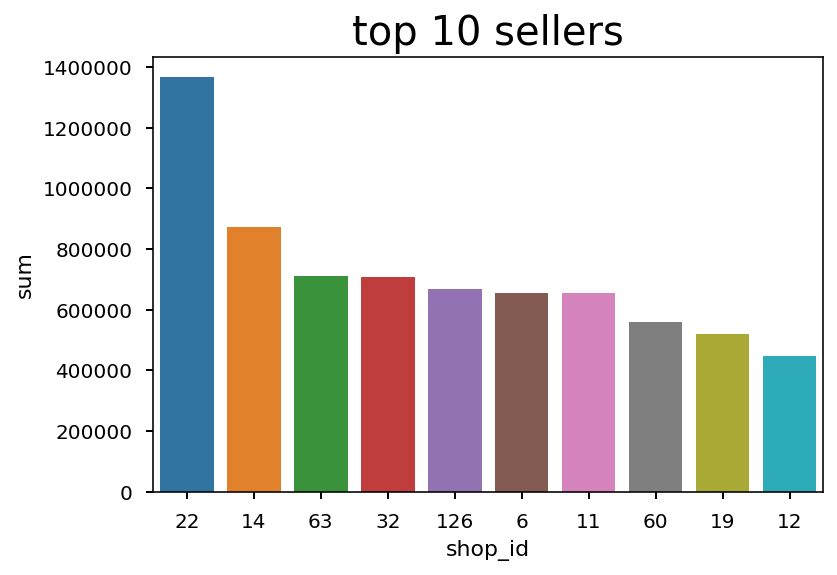

In [10]:
sns.barplot(data=table_top10, x = table_top10.index, y= 'sum', order=table_top10.index)
plt.title("top 10 sellers",fontsize = 20)

## 4. Sales by time

- zigzag 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 활용하여
  이를 시간대별 총 매출량을 구해보겠습니다.

In [11]:
sns.set_style('ticks') #

 #window use : Malgun Gothic, Mac : AppleGothic
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [12]:
order.dtypes

timestamp    object
user_id      object
goods_id      int64
shop_id       int64
price         int64
dtype: object

- timestamp를 object에서 datetime으로 형변환을 해주겠습니다.

In [13]:
order['timestamp'] = pd.to_datetime(order['timestamp'])

order['timestamp'] = pd.to_datetime(order['timestamp'])

C:\Users\hyh99\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales by time')

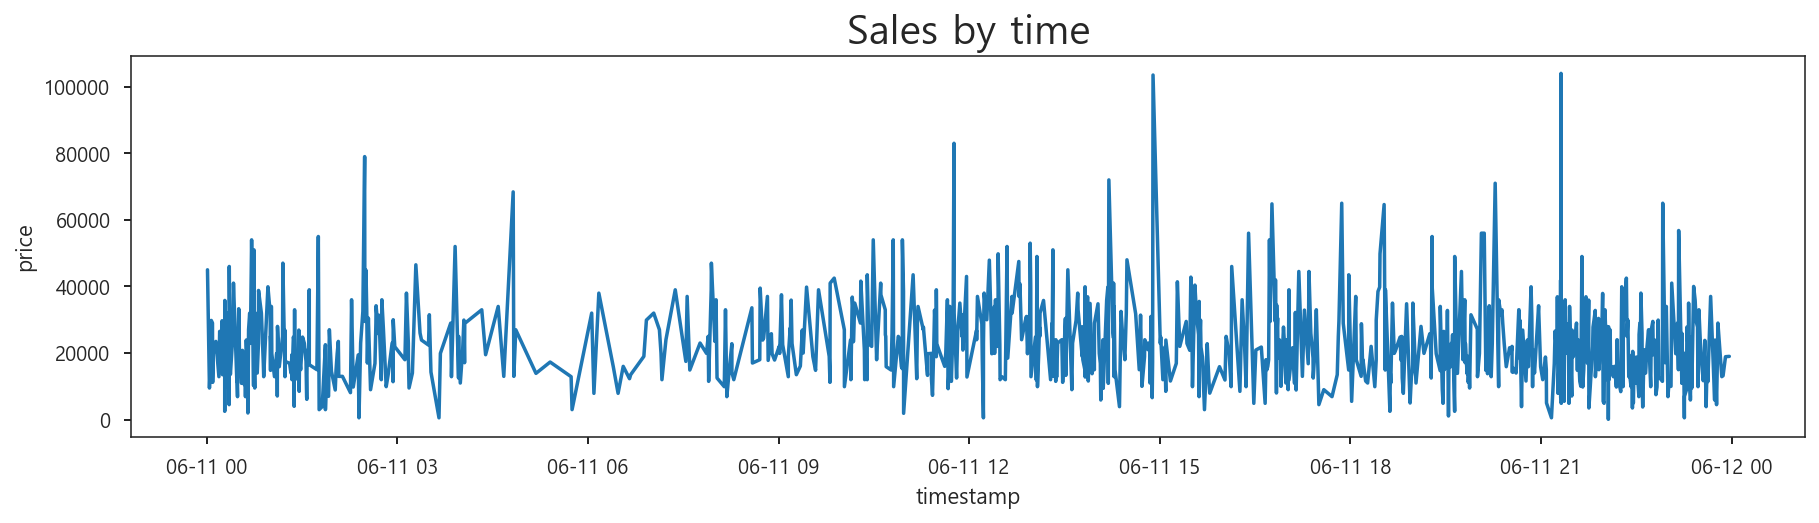

In [14]:
plt.figure(figsize=[15,3.5])
sns.lineplot(x='timestamp', y='price', data=order)
plt.title("Sales by time",fontsize = 20)

In [15]:
order['hour'] = order['timestamp'].dt.hour

In [16]:
table = order.pivot_table(values='price',
                                         index = 'hour',
                                         aggfunc = 'sum')
table.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


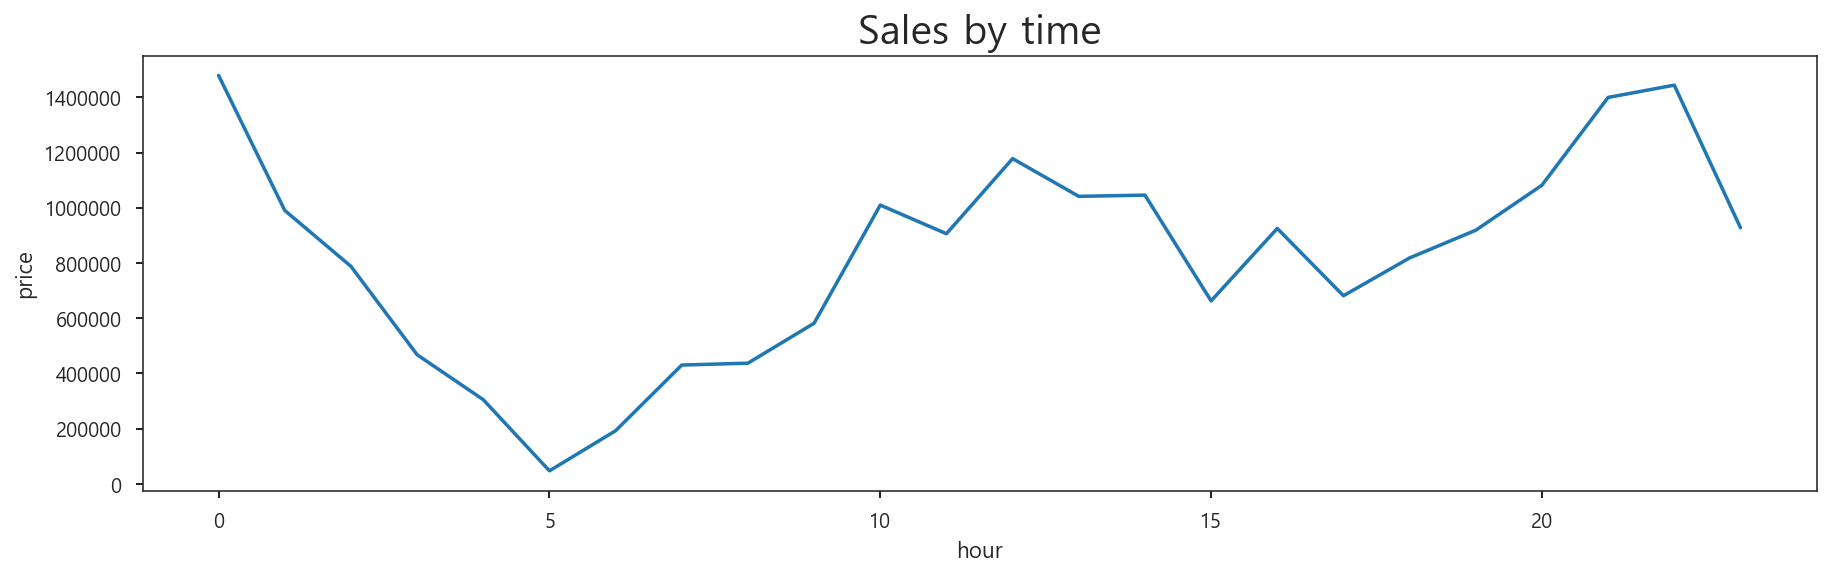

In [17]:
plt.figure(figsize=[15,4])
sns.lineplot(data=table, x=table.index, y='price')
plt.title("Sales by time",fontsize = 20)
plt.savefig('image3.png')

## 5.merge

- user table에 고객의 고유 아이디를 나타내는 user_id, 접속기기(os), age를 갖고 있습니다. 이를 활용해 top 10 쇼핑몰 매출에 어떤 연령층에서 발생했는지 분석하고자 합니다.

In [18]:
query = "SELECT * FROM 'user'"
user = pd.read_sql(query, conn)
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [19]:
merged = order.merge(user, on= 'user_id')
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


- 위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현해보겠습니다. 

In [20]:
top10_index = table_top10.index
merged_top10 = merged[(merged['shop_id'].isin(top10_index)) & (merged['age'] != -1)]

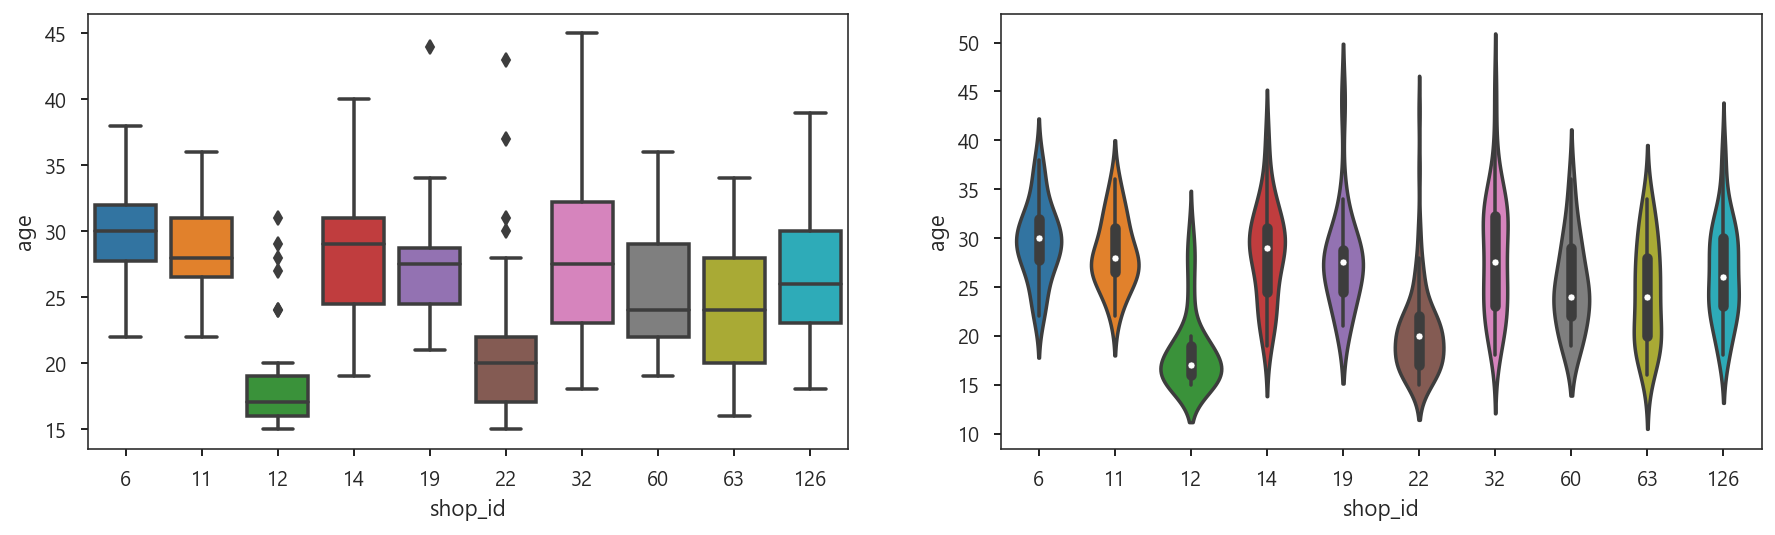

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,4])

sns.boxplot(data = merged_top10, x='shop_id', y='age', ax=ax1)
sns.violinplot(data = merged_top10, x='shop_id', y='age', ax=ax2)

fig.savefig('figure.png', dpi=400)

## 6.Create new feature

- user table에 연령대를 나타내는 새로운 feature 생성
- 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지 확인해보겠습니다.

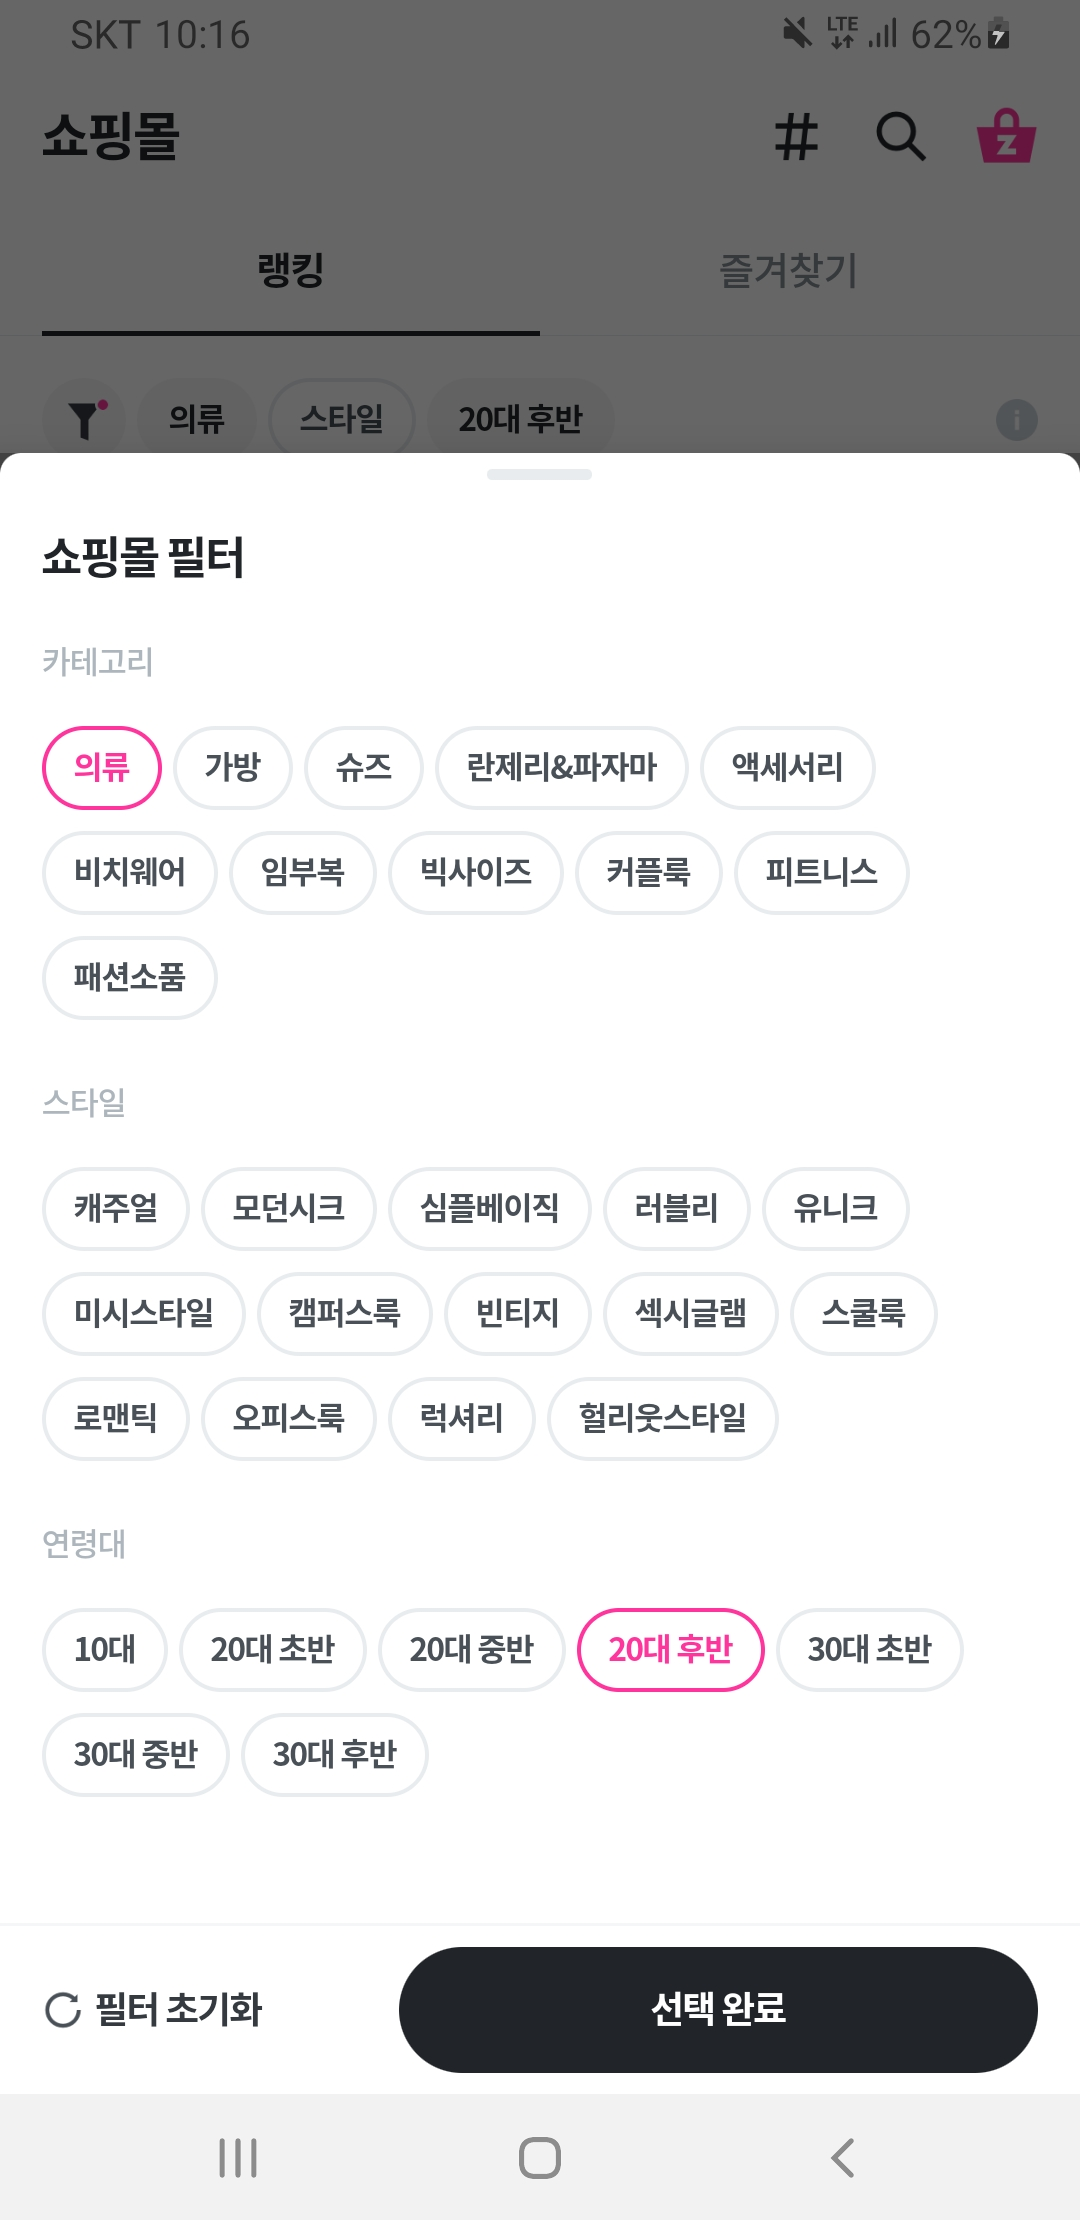

In [22]:
Image(filename = "d:/data/zigzag.jpg", width = 250, height = 100)

- zigzag에서 운영하고 있는 쇼핑몰들은 위의 필터에서 보여지는 것과 같이 연령대를 설정 할 수 있습니다. 타겟 연령대에 맞게 실구매가 이루어지는지 꾸준히 검증이 이루어져야 한다고 생각합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험(UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.

- 실제 나이를 바탕으로 user 테이블에 연령대 feature을 만들고, shop table과 user, order table을 병합, 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교해보겠습니다.

In [23]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 ==1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [24]:
user["연령대"] = user['age'].map(make_generation)
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


In [25]:
query = "SELECT * FROM 'shop'"

In [26]:
shop = pd.read_sql(query, conn, index_col='shop_id')
print(shop.shape)
shop.head()

(200, 4)


,name,category,age,style
shop_id,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [27]:
merged_table = (
order.merge(user, on='user_id')
    .merge(shop, on='shop_id')
)

merged_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


- 병합한 테이블을 이용하여 '거래 연령 일치여부' feature을 이용하여 만들어보겠습니다.

In [28]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [29]:
merged_table['거래연령 일치여부'] = merged_table.apply(check_generation, axis=1)
merged_table.head(2)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True


In [30]:
table = merged_table.pivot_table(values='거래연령 일치여부',
                                                    index='shop_id',
                                                    aggfunc=['mean', 'count'])

table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [31]:
table[table.index.isin(top10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


In [32]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

- 쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 위의 리스트로 정리되어 있습니다.
- 스타일을 갖고 있을 경우는 True 나머지 column은 False

In [37]:
for style in style_list:
    shop[f"{style}"] = shop['style'].str.contains(style)

shop.head(5)

,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
shop_id,,,,,,,,,,,,,,,,,,,,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


- 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어나 스타일 키워드를 찾고, 매출이 가장 많은 3가지 스타일을 구매 연령대 그래프를 그려보겠습니다.

In [34]:
merged = (order.merge(shop, on='shop_id').merge(user, on = 'user_id'))

print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


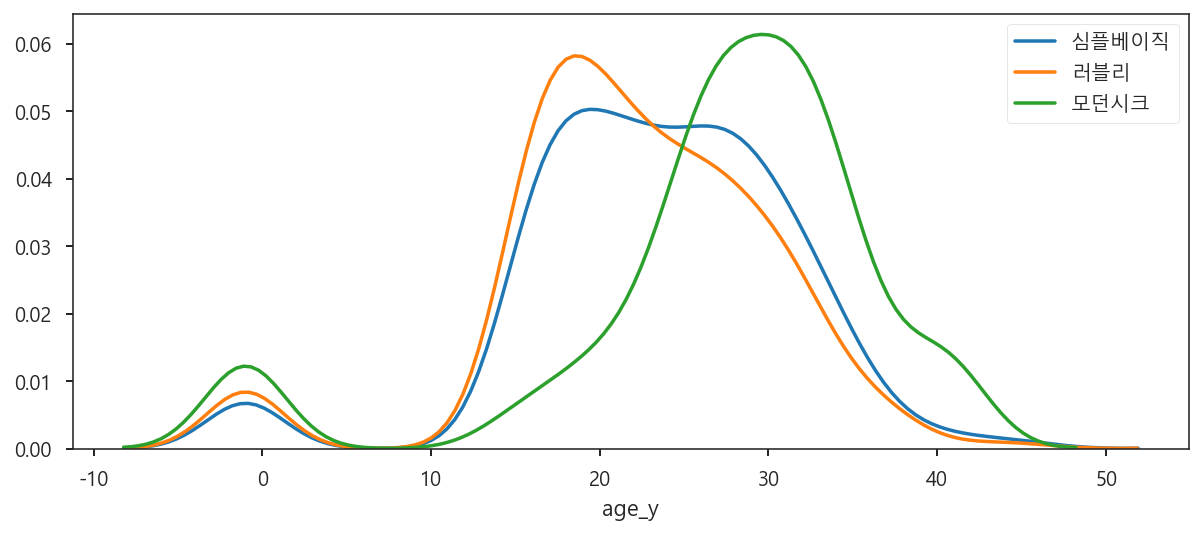

In [35]:
plt.figure(figsize=[10,4])

# sns.distplot(merged.loc[merged['심플베이직'], 'age_y'], label = '심플베이직', hist=False)
# sns.distplot(merged.loc[merged['러블리'], 'age_y'], label = '러블리', hist=False)
# sns.distplot(merged.loc[merged['모던시크'], 'age_y'], label = '모던시크', hist=False)

sns.distplot(merged.loc[merged['심플베이직'] == True, 'age_y'], label = '심플베이직', hist=False)
sns.distplot(merged.loc[merged['러블리'] == True, 'age_y'], label = '러블리', hist=False)
sns.distplot(merged.loc[merged['모던시크'] == True, 'age_y'], label = '모던시크', hist=False)

plt.savefig('dist.png', dpi=400)